## Lösung für Aufgabenblatt 1

### Aufgabe 1

a) Führen Sie für diesen Datensatz eine explorative Analyse wie in der Vorlesung gezeigt mithilfe eines IPython-Notebooks und den Paketen Pandas und Numpy durch.

The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
%load_ext version_information

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols,
                     index_col=False)

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Zeigt die ersten Zeilen der Tabelle, standardmäßig 5.
Ersten Eindruck der Spalten.

In [14]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Allgemeine Informationen über die einzelnen Spalten

In [15]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TGT      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Sichergehen ob wirklich keine Nullwerte in den Daten sind

In [16]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TGT        0
dtype: int64

Grundlegende Statistik auf die einzelnen Spalten

In [17]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Verteilungen der einzelnen Spalten anzeigen

Text(0.5, 0.98, 'Histogramme der Boston Housing Variablen')

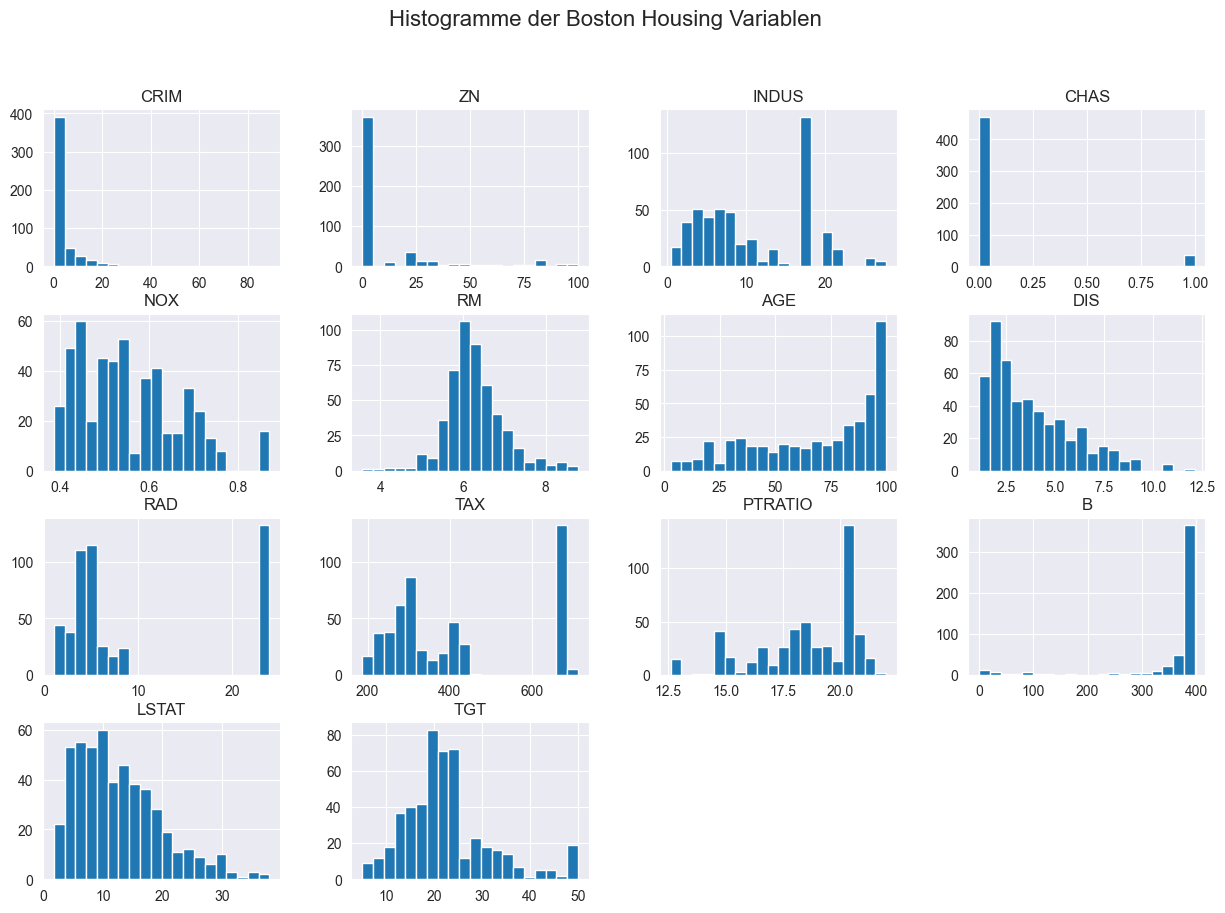

In [18]:
boston.hist(figsize=(15,10), bins=20)
plt.suptitle("Histogramme der Boston Housing Variablen", fontsize=16)

Bins legt fest in wieviele Intervalle das Balkendiagramm unterteilt wird, wenige bringt grobe Übersicht, viele -> detailierte Darstellung

<AxesSubplot: >

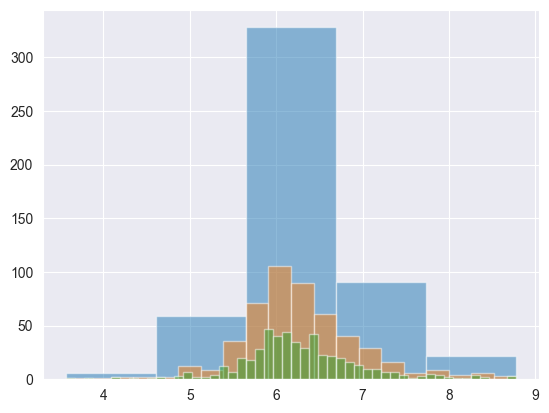

In [19]:
boston['RM'].hist(bins=5, alpha=0.5)
boston['RM'].hist(bins=20, alpha=0.5)
boston['RM'].hist(bins=50, alpha=0.5)

Korrelationen der Variablen

<AxesSubplot: >

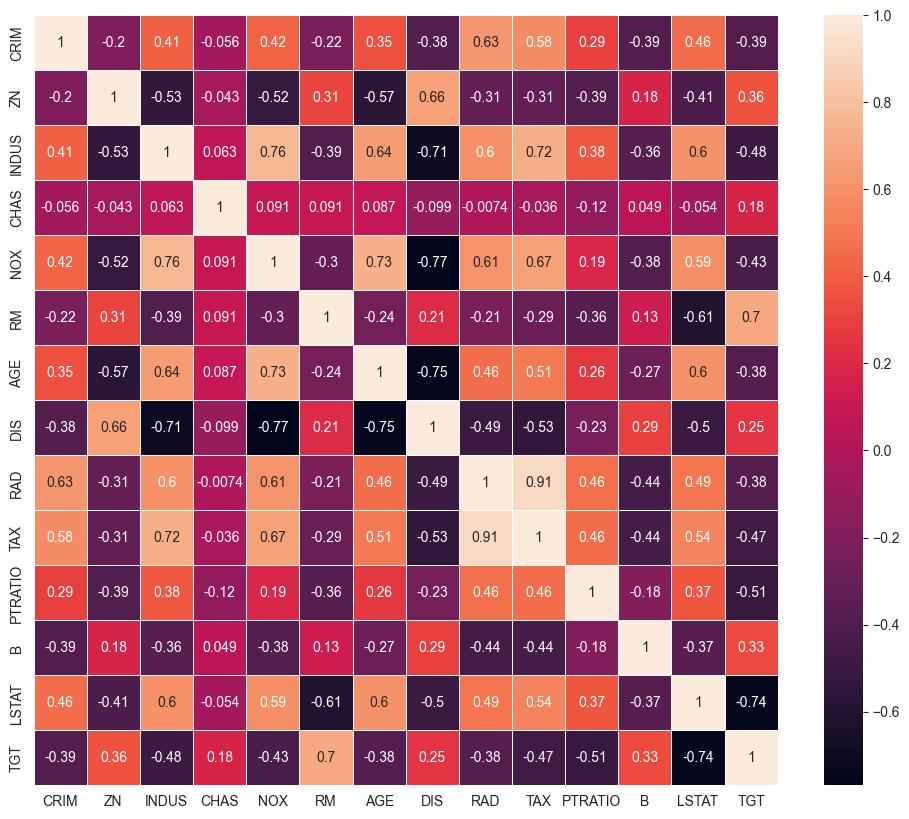

In [20]:
corr = boston.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, linewidth=.5)

b) Beantworten Sie anhand der Darstellung der Streumatrix folgende Fragen: Welche der Variablen sind kategorisch? Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? Welche dieser Variablen sind miteinander korreliert? Welche sind daher Kandidaten, die man evtl. weglassen könnte? (Beantwortung bitte als Markup in Notebook eintragen)



array([[<AxesSubplot: xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot: xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot: xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot: xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot: xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot: xlabel='B', ylabel='CRIM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot: xlabel='TGT', ylabel='CRIM'>],
       [<AxesSubplot: xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot: xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot: xlabel='NOX', ylabel='ZN'>,
        <Axe

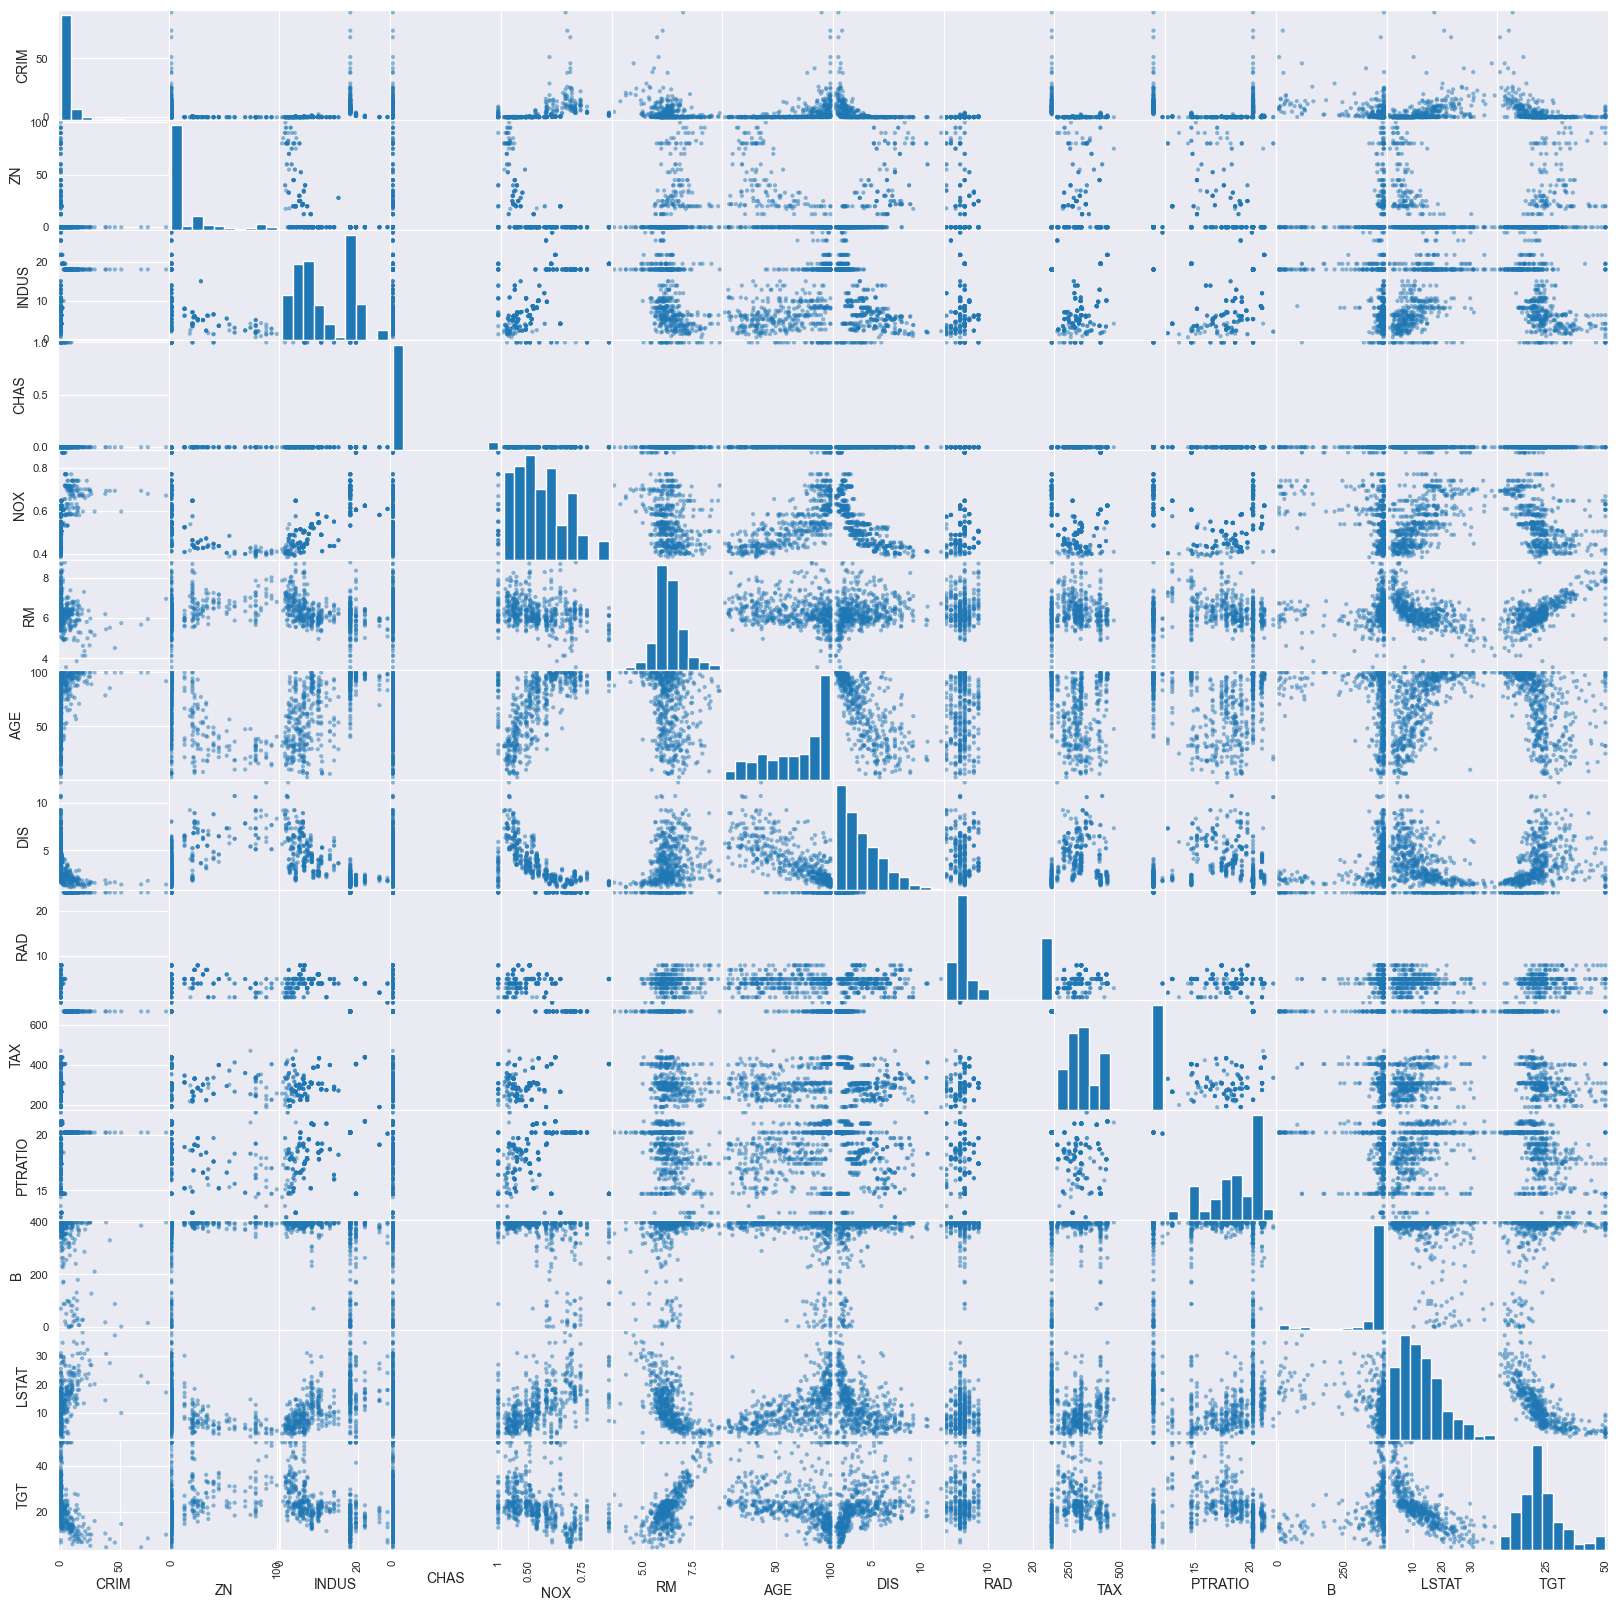

In [21]:
pd.plotting.scatter_matrix(boston, figsize=(20,20))

#### Welche der Variablen sind kategorisch?

kategorische Daten beschreiben Qualitäten oder Eigenschaften in diskreten Gruppen (wie Geschlecht oder Farbe), während numerische Daten messbare oder zählbare Werte darstellen (wie Alter oder Gewicht)

CHAS und RAD sind kategorische Variable da sie nur 0 oder 1 sein kann

#### Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum?
RM und LSTAT da beide stark mit dem Zielwert korrelieren (LSTAT aber negativ)

#### Welche dieser Variablen sind miteinander korreliert?
Siehe Korerelationsmatrix

- TAX – RAD	+0.91	Regionen mit hohem Zugang zu Schnellstraßen haben auch höhere Steuersätze
- DIS – NOX	−0.77	Nähe zu Stadtzentren (geringe Distanz) → mehr Luftverschmutzung
- INDUS – NOX	+0.76	Industrielle Gebiete → höhere Luftverschmutzung
- AGE – DIS	−0.75	Alte Häuser liegen tendenziell näher am Zentrum

#### Welche sind daher Kandidaten, die man evtl. weglassen könnte?

Alle die mit Target nicht stark korreliert sind z.b. alles mit kleiner 0,4 Korrelation


In [22]:
%version_information numpy, pandas

Software versions
Python 3.10.7 64bit [MSC v.1933 64 bit (AMD64)]
IPython 8.13.2
OS Windows 10 10.0.26200 SP0
numpy 1.23.3
pandas 2.0.1
Tue Oct 28 09:40:21 2025 Mitteleuropäische Zeit